# Chapter 3: Distance-based Source Estimator

Distance centrality is a proven suboptimal heuristic to approximate the optimal solution for finding the source ([Shah, 2011](https://doi.org/10.1109/TIT.2011.2158885)). It achieves the optimal solution for degree-regular trees, like rumor centrality. The calculation of the distance-based source estimator offers a more efficient and scalable solution when compared to the rumor source estimator, particularly in the context of undirected graphs. This is because distance centrality focuses on the proximity of a vertex to all other vertices in the network, which can be computed with algorithms that have lower computational complexity than those required for rumor centrality. Distance centrality captures the influence of a vertex based on its accessibility, making it a powerful and straightforward measure of influence that avoids the extensive tree transformations and complex calculations involved in rumor centrality. This efficiency becomes even more apparent in large-scale networks, where the scalability of algorithms is a critical concern. The distance-based source estimator can handle larger graphs with more nodes and edges, providing quicker and more reliable results. This is particularly beneficial in real-world applications like social media analysis, transportation networks, and biological networks, where the ability to swiftly analyze and interpret network data can lead to more informed decisions and insights. Because of its simplicity and efficiency, distance centrality also allows for easier interpretation and implementation, making it an attractive option for network analysts and researchers for finding the network source.

Let $G=(V(G), E(G))$ be a simple connected graph. Denote the shortest distance between two vertices, say $u$ and $v$, by $\text{dist}(u,v)$. The distance centrality of a vertex $v\in V(G)$, $S(v, G)$, is defined as 
$$
    S(v,G) = \displaystyle\sum_{w\in V(G)}\text{dist}(v, w).
$$
The distance center, $C_{\text{dist}}(G)$, of $G$ is a vertex with the smallest distance centrality.

## Graph Analytics Library

Before diving into the implementation of a function to identify the distance-based source estimator, it is crucial to familiarize oneself with two prominent graph analytics libraries. Graph analytics libraries play an important role in network and graph analysis as they provide efficient data structures, algorithms, and tools necessary for handling complex network data, facilitating the extraction of meaningful insights, and enabling the solving of complex problems related to connectivity, flow, and structure. These libraries enhance the process of graph manipulation and analysis, making it accessible even for those who may not have a deep understanding of the underlying graph theory. Utilizing such libraries enhances the efficiency, accuracy, and scalability of network-related computations, which is particularly important in fields like social network analysis, bioinformatics, transportation, and telecommunication, where networks can be massive and complex. Hence, having a solid grasp of these graph analytics libraries is indispensable for anyone looking to perform advanced network and graph analytics.

1. *NetworkX* ([Hagberg, 2008](https://www.osti.gov/biblio/960616)) is a powerful Python library designed for the creation, analysis, and visualization of complex networks, providing a versatile toolset that caters to a wide array of network applications. It facilitates the manipulation of both directed and undirected graphs, allowing for the storage of nodes and edges with associated metadata. NetworkX stands out for its ease of use and flexibility, offering an extensive collection of algorithms that cover various domains including graph theory, social network analysis, and network science. Users can leverage NetworkX to compute shortest paths, find network clusters, measure centrality, and more. Its integration with standard Python libraries like NumPy, SciPy, and Matplotlib enhances its functionality, enabling efficient numerical computations and high-quality visualizations. Despite its focus on simplicity, NetworkX does not compromise on performance for small to medium-sized networks, making it a popular choice among researchers, educators, and data scientists for experimenting with and analyzing networked systems. The library’s open-source nature and active community further contribute to its continuous development, ensuring it remains a reliable and up-to-date resource for network analysis.

2. The *Stanford Network Analysis Project (SNAP)* ([Leskovec, 2016](https://doi.org/10.48550/arXiv.1606.07550)) is a comprehensive library and research initiative developed to facilitate the analysis, modeling, and visualization of large-scale network data. Originating from Stanford University, SNAP provides an extensive set of tools and algorithms designed to work efficiently with networks containing millions of nodes and edges. It supports various programming languages, including C++ and Python, and offers functionalities to handle diverse network types, from social networks and web graphs to biological networks. With a focus on both performance and ease of use, SNAP enables researchers and practitioners to delve into network analysis, uncovering patterns, detecting anomalies, and deriving insights from complex relational data. The project also encompasses a rich collection of network datasets, which serves as a valuable resource for empirical studies and benchmarking. Through its robust features and extensive documentation, SNAP has become an influential platform in the network analysis community, fostering innovation and facilitating interdisciplinary research in network science.

In this chapter, we will use the NetworkX library as an example to implement the algorithm for finding the distance-based source estimator.

**Step 1: Import the NetworkX Library**

In [1]:
import networkx as nx

**Step 2: Create a Graph with NetworkX**

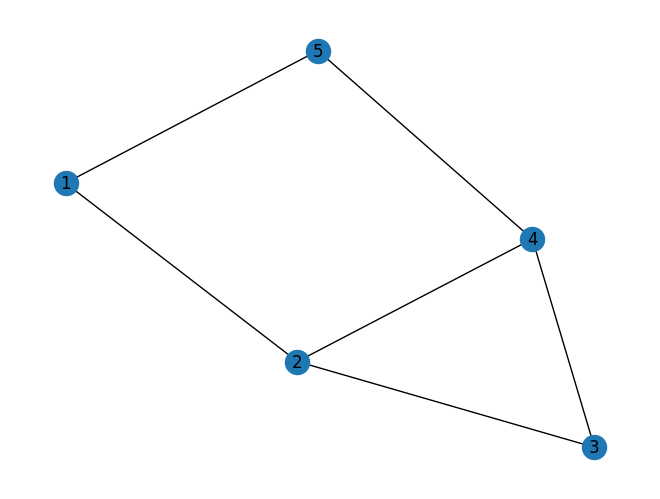

In [2]:
# Create an undirected graph
G = nx.Graph()

# Add edges to the graph (this also adds the vertices)
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (1, 5), (2, 4)]
G.add_edges_from(edges)

# Visualize the graph
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()

**Step 3: Compute Distance Centrality for Each Vertex**

Distance centrality is computed as the reciprocal of the sum of the shortest path distances from a vertex to all other vertices. NetworkX provides a function to calculate this directly.

In [3]:
# Compute the distance centrality of each vertex
distance_centrality = nx.closeness_centrality(G)

# Print the distance centrality of each vertex
print("Distance Centrality of Each Vertex")
for ids in distance_centrality:
    print("Vertex", ids, ":", distance_centrality[ids])

Distance Centrality of Each Vertex
Vertex 1 : 0.6666666666666666
Vertex 2 : 0.8
Vertex 3 : 0.6666666666666666
Vertex 4 : 0.8
Vertex 5 : 0.6666666666666666


**Step 4: Find the Distance Center**

The distance center is the vertex with the maximum distance centrality.

In [4]:
# Find the vertex with maximum distance centrality
distance_center = max(distance_centrality, key=distance_centrality.get)
print("Distance Center: Vertex", distance_center)

Distance Center: Vertex 2


By running the above steps, a sample graph can be created, the distance centrality for each vertex can be computed, and the distance center of the graph can be identified.

Please ensure the libraries NetworkX and Matplotlib are installed to run the above example. This can be done by using **pip install networkx matplotlib**.

### References

1. Hagberg, A., Swart, P., & S Chult, D. (2008). Exploring network structure, dynamics, and function using NetworkX (No. LA-UR-08-05495; LA-UR-08-5495). Los Alamos National Lab.(LANL), Los Alamos, NM (United States).
2. Leskovec, J., & Sosič, R. (2016). SNAP: A general-purpose network analysis and graph-mining library. ACM Transactions on Intelligent Systems and Technology (TIST), 8(1), 1-20.
3. Shah, D., & Zaman, T. (2011). Rumors in a network: Who's the culprit?. IEEE Transactions on information theory, 57(8), 5163-5181.
4. Hang, C. N., Yu, P. D., Chen, S., Tan, C. W., & Chen, G. (2023). MEGA: Machine Learning-Enhanced Graph Analytics for Infodemic Risk Management. IEEE Journal of Biomedical and Health Informatics.